 ## 1. Implementation the classification of MNIST Dataset using CNN

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import backend as k


In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
import matplotlib.pyplot as plt


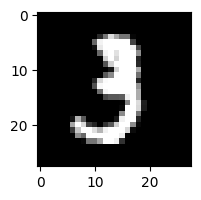

In [4]:
plt.figure(figsize=(2,2))
plt.imshow(x_train[10],cmap='gray')
plt.show()

In [5]:
 xtrain=x_train[:]
 ytrain=y_train[:]
 xtest=x_test[:]
 ytest=y_test[:]

In [6]:
 xtrain.shape

(60000, 28, 28)

In [7]:
xtest.shape

(10000, 28, 28)

In [8]:
 xtrain1=xtrain.reshape(60000,28,28,1)
 xtest1=xtest.reshape(10000,28,28,1)

In [9]:
 ytrain1 = keras.utils.to_categorical(ytrain)
 ytest1 = keras.utils.to_categorical(ytest)

In [10]:
 model=Sequential()
 model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)))
 model.add(MaxPooling2D(pool_size=(3, 3)))
 model.add(Conv2D(32,kernel_size=3,activation='relu'))
 model.add(MaxPooling2D(pool_size=(3, 3)))
 model.add(Flatten())
 model.add(Dense(10, activation='softmax'))

C:\python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam',
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
model.summary()
model.fit(xtrain1, ytrain1, validation_data=(xtest1,ytest1),epochs=10, batch_size=1)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 6, 6, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,394 (79.66 KB)

 Trainable params: 20,394 (79.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 235s 4ms/step - accuracy: 0.8657 - loss: 0.7989 - val_accuracy: 0.9475 - val_loss: 0.1720
Epoch 2/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 268s 4ms/step - accuracy: 0.9484 - loss: 0.1839 - val_accuracy: 0.9520 - val_loss: 0.1943
Epoch 3/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 377s 6ms/step - accuracy: 0.9535 - loss: 0.1687 - val_accuracy: 0.9609 - val_loss: 0.1319
Epoch 4/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 238s 4ms/step - accuracy: 0.9550 - loss: 0.1592 - val_accuracy: 0.9433 - val_loss: 0.2305
Epoch 5/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 374s 6ms/step - accuracy: 0.9553 - loss: 0.1614 - val_accuracy: 0.9612 - val_loss: 0.1442
Epoch 6/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 333s 6ms/step - accuracy: 0.9556 - loss: 0.1613 - val_accuracy: 0.9644 - val_loss: 0.1249
Epoch 7/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 365s 6ms/step - accuracy: 0.9492 - loss: 0.1761 - val_accuracy: 0.9559 - val_loss: 0.1414
Epoch 8/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 428s 7ms/step - ac

In [12]:
score = model.evaluate(xtest1, ytest1, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

loss= 0.1707460880279541
accuracy= 0.9448999762535095


In [13]:
 from sklearn.metrics import confusion_matrix,classification_report
 confusion = confusion_matrix(np.argmax(ytest1,axis=1),np.argmax(model.predict(xtest1),axis=1),labels=list(np.arange(0,10)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [14]:
predy1= model.predict(xtest1)
ytest1[:5]
predy1[:5].round()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [15]:
ytest1=np.argmax(ytest1,axis=1)
predy1=np.argmax(predy1.round(),axis=1)
confusion=confusion_matrix(ytest1,predy1)
classificationR=classification_report(ytest1,predy1)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       980
           1       0.98      0.96      0.97      1135
           2       0.96      0.96      0.96      1032
           3       0.96      0.95      0.95      1010
           4       0.98      0.84      0.90       982
           5       0.96      0.93      0.95       892
           6       0.95      0.98      0.96       958
           7       0.95      0.95      0.95      1028
           8       0.93      0.93      0.93       974
           9       0.88      0.95      0.91      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



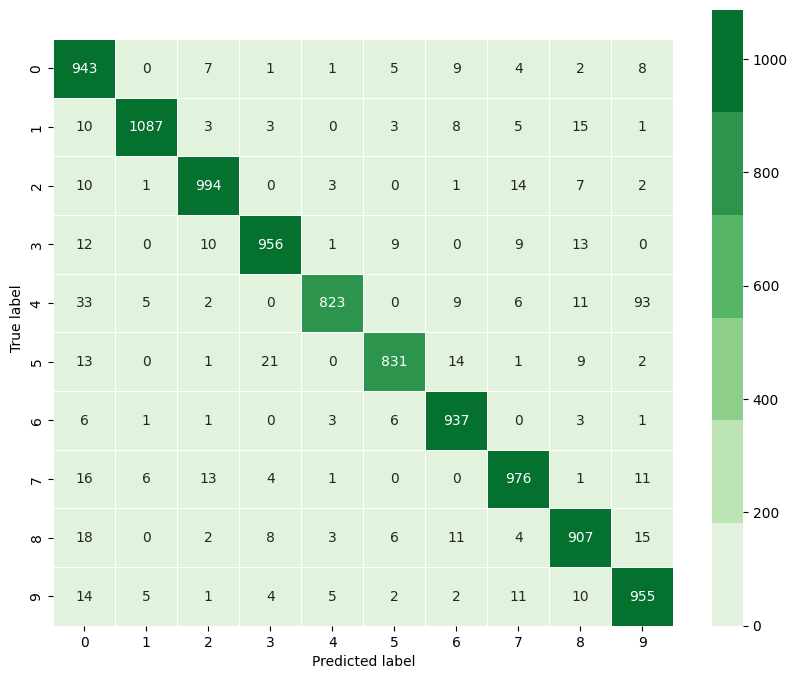

In [17]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(confusion, annot=True,ax=ax,fmt="d",linewidths=.5,cmap=sns.color_palette("Greens"));
plt.ylim([ 10,-0.5,]);
plt.ylabel('True label')
plt.xlabel('Predicted label')
print(classificationR)
